In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("./students_simple.csv")

In [20]:
N = 6
cols = ['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp', 'friends',	'test_time']
col1 = cols[N % 5]
col2 = cols[(N ** 2) % 5 + 5]

### Column 1

In [21]:
col1

'mass'

### Column 2

In [22]:
col2

'bmi'

In [23]:
x = data[col1]
y = data[col2]

# 1. Расчет корреляций

# Фехнера

In [24]:
    xm = np.mean(x)
    ym = np.mean(y)
    
    xi_xm = x - xm
    yi_ym = y - ym
    
    x_sign = np.sign(xi_xm)
    y_sign = np.sign(yi_ym)
    
    C = np.sum(x_sign == y_sign)
    H = np.sum(x_sign != y_sign)
    
    K_f = (C - H) / (C + H)
    K_f

np.float64(-0.9)

Вывод: коэффициент Фехнера будет отрицательный и близок к -1, что указывает на сильную обратную зависимость, т.е. высокая масса соответствует низкому BMI и наоборот — строгая обратная зависимость.

In [25]:
    results_table = pd.DataFrame({
            'col1': x,
            'col2': y,
            'xi - xm': xi_xm,
            'yi - ym': yi_ym,
            'sign(xi-xm)': x_sign,
            'sign(yi-ym)': y_sign,
            'signs_equal': x_sign == y_sign
        })

    results_table

,col1,col2,xi - xm,yi - ym,sign(xi-xm),sign(yi-ym),signs_equal
0,45,3.533,-22.45,0.91965,-1.0,1.0,False
1,61,2.623,-6.45,0.00965,-1.0,1.0,False
2,56,2.875,-11.45,0.26165,-1.0,1.0,False
3,48,3.375,-19.45,0.76165,-1.0,1.0,False
4,54,3.000,-13.45,0.38665,-1.0,1.0,False
5,58,2.828,-9.45,0.21465,-1.0,1.0,False
6,51,3.255,-16.45,0.64165,-1.0,1.0,False
7,62,2.726,-5.45,0.11265,-1.0,1.0,False
8,70,2.429,2.55,-0.18435,1.0,-1.0,False
9,72,2.361,4.55,-0.25235,1.0,-1.0,False


## Пирсона + доверительный интервал

In [26]:

    sigma_x = np.sqrt(np.var(x))
    sigma_y = np.sqrt(np.var(y))

    xy = x * y
    xy_mean = np.mean(xy)
    sigma_xy = xy_mean - (xm * ym)

    r_xy = sigma_xy / (sigma_x * sigma_y)
    r_xy

np.float64(-0.9606094762709764)

Вывод: связь статистически значимая

In [27]:
    confidence=0.95
    z = np.arctanh(r_xy)  
    se_z = 1 / np.sqrt(len(x) - 3)
    z_critical = stats.norm.ppf((1 + confidence) / 2)
    z_lower = z - z_critical * se_z
    z_upper = z + z_critical * se_z
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    print(r_lower,"-", r_upper)

-0.984590865385486 - -0.901164329761658


Вывод: весь интервал отрицательный, не включает 0, что подтверждает значимую обратную связь

Узкий интервал значит, что оценка надёжная, разброс значений относительно корреляции небольшой

## Спирмена

In [28]:
def get_ranks(data):
    indexed = [(value, idx) for idx, value in enumerate(data)]
    sorted_data = sorted(indexed, key=lambda x: x[0])
    ranks = [0] * len(data)
    for rank, (value, original_idx) in enumerate(sorted_data):
        ranks[original_idx] = rank + 1
    return np.array(ranks)  

In [29]:
    xr = get_ranks(x)
    yr = get_ranks(y)
    sigma_xr = np.sqrt(np.var(xr))
    sigma_yr = np.sqrt(np.var(yr))

    xyr = xr * yr
    xyr_mean = np.mean(xyr)
    xrm = np.mean(xr)
    yrm = np.mean(yr)
    sigma_xyr = xyr_mean - (xrm * yrm)

    r_xyr = sigma_xyr / (sigma_xr * sigma_yr)
    r_xyr

np.float64(-0.9789473684210523)

Если результат близок к -1, то сильная обратная монотонная зависимость:

То есть чем больше масса, тем меньше BMI, практически строго по монотонной линии

## Кенделла

In [30]:
    n = len(x)
    discordant_pairs = 0
    for i in range(n-1):
            x_comp = x[i] < x[i+1:]
            y_comp = y[i] < y[i+1:]
            discordant_pairs += np.sum(x_comp != y_comp)
        
    K = 1 - (4 * discordant_pairs) / (n * (n - 1))
    K

np.float64(-0.9473684210526316)

τ < 0 говорит о обратной зависимости между массой и BMI: чем больше масса, тем меньше BMI в этом наборе данных.

Абсолютное значение τ близко к 1, то сильная корреляция

# 2. Визуализация

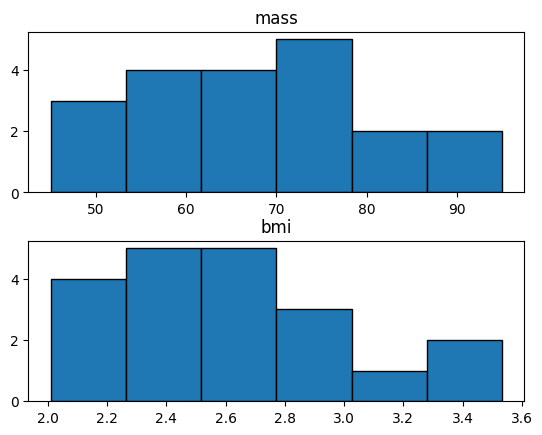

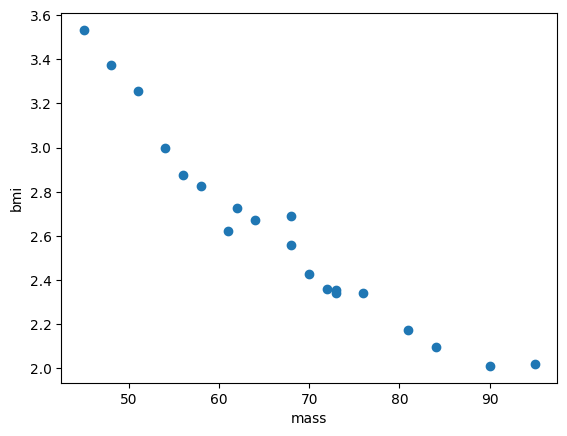

In [31]:
fig, ax = plt.subplots(2)
ax[0].hist(x, bins=1 + int(1 + int(np.log2(n))), edgecolor="black")
ax[1].hist(y, bins=1 + int(1 + int(np.log2(n))), edgecolor="black")
ax[0].set_title(col1)
ax[1].set_title(col2)
plt.subplots_adjust(hspace=0.3)
plt.show()

plt.scatter(x, y)
plt.xlabel(col1)
plt.ylabel(col2)
plt.show()


Гистограммы показывают, что распределение похоже на нормальное, а график рассеяния также показывает обратную зависимость

# 3.Уравнение регрессии

In [32]:
def linear(x, y):
    X = np.column_stack((x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = X @ w
    return w, y_pred

def quadratic(x, y):
    X = np.column_stack((x**2, x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = X @ w
    return w, y_pred

def hyper(x, y):
    X = np.column_stack((1 / x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y, rcond=None)[0]
    y_pred = X @ w
    return w, y_pred

def logarifm(x, y):
    y_log = np.log(y)
    X = np.column_stack((x, np.ones_like(x)))
    w = np.linalg.lstsq(X, y_log, rcond=None)[0]
    return np.exp(w), np.exp(X @ w)

w_lin, pred_y_lin = linear(x, y)
w_quad, pred_y_quad = quadratic(x, y)
w_hyp, pred_y_hyp = hyper(x, y)
w_log, pred_y_log = logarifm(x, y)
print(w_lin)
print(w_quad)
print(w_hyp)
print(w_log)

[-0.03075963  4.68808689]
[ 4.93290812e-04 -9.89982135e-02  6.95961044e+00]
[135.24267603   0.52752043]
[0.9883536  5.68570516]


In [33]:
def calculate_r2(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

def calculate_f_statistic(r2, n, k):
    return (r2 / (1 - r2)) * ((n - k) / (k - 1))

r2_lin = calculate_r2(y, pred_y_lin)
f_lin = calculate_f_statistic(r2_lin, n, 2)
print(r2_lin, " ", f_lin)

r2_quad = calculate_r2(y, pred_y_quad)
f_quad = calculate_f_statistic(r2_quad, n, 3)
print(r2_quad, " ", f_quad)

r2_hyp = calculate_r2(y, pred_y_hyp)
f_hyp = calculate_f_statistic(r2_hyp, n, 2)
print(r2_hyp, " ", f_hyp)

r2_log = calculate_r2(y, pred_y_log)
f_log = calculate_f_statistic(r2_log, n, 2)
print(r2_log, " ", f_log)



0.9227705659015859   215.07175832808062
0.9779302384431465   376.64235770528467
0.979132744595704   844.5954708108991
0.9542387362820837   375.34578063570143


# Графики

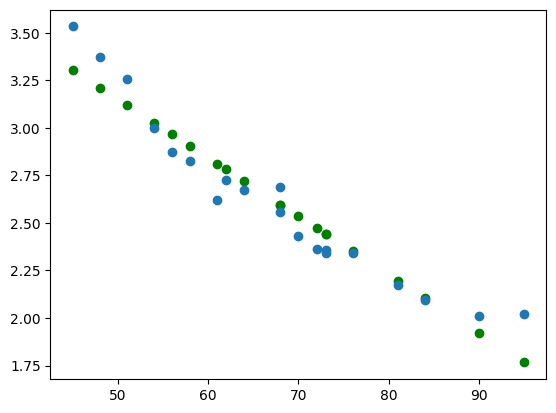

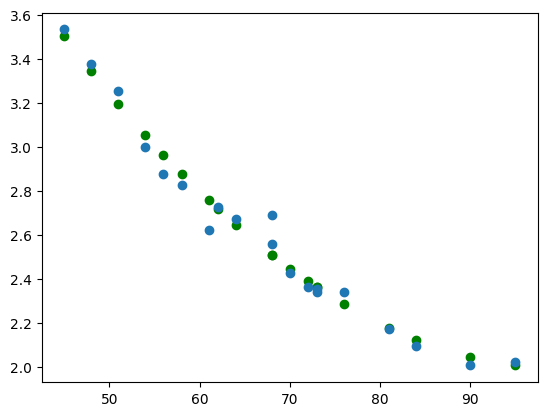

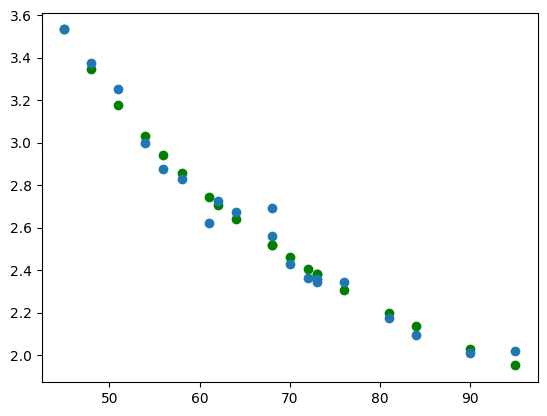

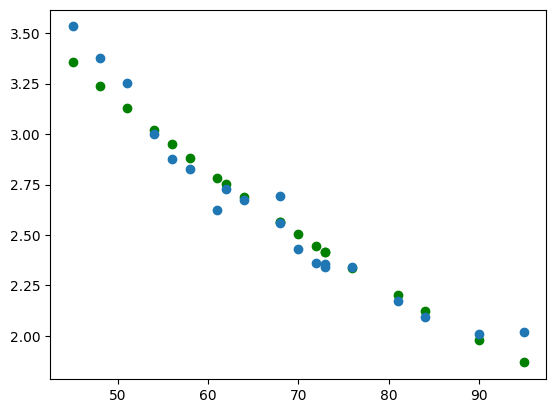

In [34]:
plt.scatter(x, pred_y_lin, color="green")
plt.scatter(x, y)
plt.show()


plt.scatter(x, pred_y_quad, color="green")
plt.scatter(x, y)
plt.show()

plt.scatter(x, pred_y_hyp, color="green")
plt.scatter(x, y)
plt.show()

plt.scatter(x, pred_y_log, color="green")
plt.scatter(x, y)
plt.show()